# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas para Captura e Tratamento de Dados</span>

## <span style="color:blue">Análise de Componentes Principais -  Avaliação</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

Os exercícios abaixo farão uso do conjunto de dados <font style="font-family: monaco">blobs2.csv</font> disponível no _moodle_.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercício 1)
Calcule as direções principais dos dados contidos no arquivo <font style="font-family: monaco">blobs2.csv</font>. Quais são os valores das duas maiores variâncias?

Escolha uma:<br>
<b>a. 1162.75 e 993.63<br>
b. 271.17 e 160.90<br>
c. 1074.60 e 338.02<br>
d. 338.02 e 271.17<br>

In [11]:
data = pd.read_csv('.\\data\\blobs2.csv')
print(data.shape)
data.head()

(600, 25)


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,-9.587828,-4.640974,-7.238876,-6.755609,-7.260508,-4.018110,-2.473796,-8.732220,2.967323,1.927218,...,-4.232223,4.621523,-7.881127,5.715173,-2.198992,-5.652042,2.294532,-11.305678,6.456732,-9.103836
1,4.430200,-7.408960,6.542226,-0.340267,-3.035140,-6.110085,5.947367,1.504693,0.159693,-10.043071,...,-1.490352,-1.379686,2.898314,-11.554418,3.995090,5.556163,-6.243226,-6.956367,-4.079177,-3.332520
2,1.687488,-4.747313,7.714434,0.466089,-1.147214,-3.827851,6.199882,-1.339071,2.281886,-10.378856,...,-1.600070,-2.524161,5.790805,-9.779573,3.976283,4.339449,-5.007315,-7.194471,-3.641903,-4.378965
3,0.580085,5.054813,1.156155,1.735212,0.433977,3.390672,-1.775347,7.299190,10.483092,-3.457759,...,-7.155131,-10.292705,6.859731,6.322292,7.500807,8.617424,4.512770,0.240015,6.106763,-7.057556
4,0.549273,-2.220818,10.625565,-7.102454,-5.502638,-7.016894,3.315088,-5.413384,-2.160280,-3.655956,...,-3.004390,5.946111,-7.085767,5.839948,-7.414791,9.395698,-2.193346,7.786570,0.974318,5.583822


In [78]:
from sklearn.decomposition import PCA

pca_obj = PCA(svd_solver='full')
data_transformed = pca_obj.fit(data.values)

#montando um array onde temos as duas principais direções armazenadas num array. O primeiro com a linha de maior variância
#e o segundo com a segunda linha de maior variância
maiores_variancias = data_transformed.components_[0:2]

print('Resposta: a. 1162.75 e 993.63')
print()
#explained variance me mostra os maiores elementos daquela linha que explicam a variância.
print('%.3f' % data_transformed.explained_variance_[0])
print('%.3f' % data_transformed.explained_variance_[1])

Resposta: a. 1162.75 e 993.63

1162.758
993.633


### Exercício 2)
Qual o número mínimo de direções principais necessárias para representar $90\%$ da informação contida nos dados?

Escolha uma:<br>
<b>a. 3<br>
b. 4<br>
c. 5<br>
d. 6<br>

In [36]:
#utilizamos o explained_variance_ratio que contém a porcentagem de informação em cada direção (do maior para o menor)
perc=0.0
num_component = 0

#para o tamanho dos elementos da ratio achamos os seus percentuais e armazenamos em perc. Depois checamos quantos são >= 90%.
for i in range(data_transformed.explained_variance_ratio_.shape[0]):
    perc += data_transformed.explained_variance_ratio_[i]
    if perc >=0.9:
        num_component = i+1
        break

print('Resposta: ',num_component)

Resposta:  5


### Exercício 3)
Existem _outliers_ nos dados originais. Utilize z-score com um threshold de 2.8 para identificar os outliers e removê-los dos dados. Quantos outliers foram identificados?

Escolha uma:<br>
<b>a. 4<br>
b. 3<br>
c. 5<br>
d. 6<br>

In [42]:
from scipy.stats import zscore

#calcula z-score
data_zscore = zscore(data,axis=0)

#encontra outliers
outlier = np.abs(data_zscore) > 2.8
outlier_id = np.argwhere(outlier == True)

#removendo outliers
data_sem_outlier = data.drop(outlier_id[:,0],axis=0)

print('Resposta: ',outlier_id.shape[0])
print()
print('Shape dos dados originais:', data.shape)
print('Shape dos dados sem outlier:', data_sem_outlier.shape)
print()
print('Linhas com outliers:', outlier_id)
print()
print('Número de outliers identificados:',outlier_id.shape[0])

Resposta:  5

Shape dos dados originais: (600, 25)
Shape dos dados sem outlier: (595, 25)

Linhas com outliers: [[116  13]
 [240  16]
 [286   5]
 [298  17]
 [398   6]]

Número de outliers identificados: 5


### Exercício 4)
Qual a procentagem de informação representada pelas 4 primeiras componentes principais após a remoção dos outliers?

Escolha uma:<br>
<b>a. aproximadamente 97%<br>
b. aproximadamente 90%<br>
c. aproximadamente 87%<br>
d. aproximadamente 80%<br>

In [74]:
data_sem_outlier_transformed = pca_obj.fit(data_sem_outlier.values)
maiores_variancias_sem_outlier = data_sem_outlier_transformed.components_[0:4]
perc = data_sem_outlier_transformed.explained_variance_ratio_
print('Resposta: a. aproximadamente 97%')
print()
print("Percentual de maiores variâncias: ")
print(perc)
print()
print('Total dos 4 primeiros componentes:',int(sum(perc[0:4])*100),'%')

Resposta: a. aproximadamente 97%

Percentual de maiores variâncias: 
[0.40797396 0.34470211 0.21677456 0.00188786 0.00182726 0.00174456
 0.00173148 0.00166477 0.00160839 0.00156057 0.00149408 0.00146905
 0.00142417 0.00138814 0.00135414 0.0013118  0.00127311 0.0012421
 0.0012167  0.00117687 0.00112642 0.00111238 0.0010522  0.00097218
 0.00091112]

Total dos 4 primeiros componentes: 97 %


### Exercício 5)
Projete os dados sem outliers nas duas primeiras direções principais. Quantos clusters você consegue visualizar na projeção?

Escolha uma:<br>
<b>a. 6<br>
b. 4<br>
c. 5<br>
d. 3<br>

Resposta: 4


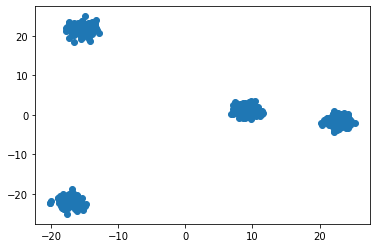

In [77]:
grafico_2D = np.dot(data_sem_outlier,data_sem_outlier_transformed.components_[0:2].T)
plt.scatter(grafico_2D[:,0],grafico_2D[:,1])

print('Resposta: 4')